In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from scipy.io import arff

import matplotlib as mpl
import matplotlib.pyplot as plt

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features.pca import PCADecomposition

from sklearn import decomposition
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import random_projection
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import ExtraTreesClassifier

from scipy import stats
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn import cluster
from  sklearn.preprocessing import OneHotEncoder

random_state = 69

In [ ]:
#     Unsupervised learning
#     k-means clustering
#     Expectation Maximization

##loading wine data ..
file = "income_data_final.csv"
df = pd.read_csv(file)
df = df.sample(frac=1).reset_index(drop=True)

onehotencoder = OneHotEncoder(categorical_features = [1,3,4,5,6,7,8,9])
x_features = onehotencoder.fit_transform(x_features).toarray()

y_predict = df.y_predict

#.1024
#x_g,x_hypertune, y_g, y_hypertune  = train_test_split(x_features, y_predict, test_size=0.1024, random_state=143)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=143)
x_g,x_hypertune, y_g, y_hypertune = train_test_split(x_train, y_train, test_size=0.2, random_state=122)

# x_train1_standard = (x_train1-np.mean(x_train1))/np.std(x_train1)
# x_val1_standard = (x_val1-np.mean(x_train1))/np.std(x_train1)
# x_test_standard = (x_test-np.mean(x_train1))/np.std(x_train1)


x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=40)

x_train = pd.DataFrame.from_records(x_train)
#y_train = pd.DataFrame.from_records(y_train)

x_test = pd.DataFrame.from_records(x_test)
#y_test = pd.DataFrame.from_records(y_test)

num_of_comp = 30#len(x_test.columns)

x_train_list = np.array(x_train.values.tolist())
y_train_list = np.array(y_train.values.tolist())

x_test_list = np.array(x_test.values.tolist())
y_test_list = np.array(y_test.values.tolist())


def get_eigen_value(pca, X):
    
    # We center the data and compute the sample covariance matrix.
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.dot(X_centered.T, X_centered) / len(X)
    eigenvalues = pca.explained_variance_
    for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
        print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
        print(eigenvalue)

def bench_k_means(x, y, estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(x, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=len(x))))

def feature_corr(x):
    correlations = x.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    

In [ ]:
#     k-means clustering
def run_kmeans(n_clusters, x, y):
    sample_size = len(y)

    print(82 * '_')
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    for n in range(2,10):
        bench_k_means(x, y, KMeans(init='k-means++', n_clusters=n, n_init=30, random_state=random_state),
                      name="k-means++ " + str(n), data=x)

    print(82 * '_')
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each




    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(x)        # Fit the data to the visualizer
    visualizer.show() 

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    visualizer = InterclusterDistance(kmeans)
    visualizer.fit(x)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure


    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    visualizer = KElbowVisualizer(kmeans, k=(4,12))
    visualizer.fit(x)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    kmeans.fit(x_train)
    #Z = kmeans.predict(np.c_[x_train, y_train])
    X = kmeans.cluster_centers_
    plt.scatter(X[:,0],X[:,1], label='True Position')

run_kmeans(8, x_train, y_train)


__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	6.42s	2557165	0.000	0.000	0.000	0.001	-0.000	0.515
k-means++ 3	10.62s	1512110	0.000	0.000	0.000	-0.000	0.000	0.442
k-means++ 4	13.94s	1104864	0.000	0.000	0.000	0.000	-0.000	0.386
k-means++ 5	15.48s	915067	0.000	0.000	0.000	0.000	-0.000	0.339
k-means++ 6	19.18s	800606	0.000	0.000	0.000	-0.000	0.000	0.303
k-means++ 7	19.05s	728881	0.000	0.000	0.000	0.000	-0.000	0.273
k-means++ 8	21.25s	681321	0.000	0.000	0.000	0.000	-0.000	0.237


spherical
lower bound,  -34.372613114225814
converged,  True

diag
lower bound,  -4.293610089414628
converged,  True

tied
lower bound,  -3.647550148316808
converged,  True

full
lower bound,  -1.9058208632227287
converged,  True



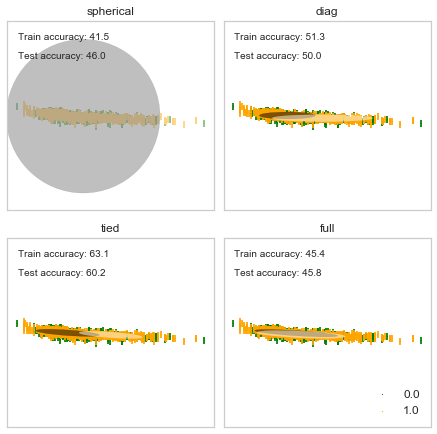

In [267]:
###Expectation Maximization###
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
n_classes = len(np.unique(y_train))
colors = ['0', '1']
a_color = ['green', 'orange']



def run_em(x, y, xtest, ytest):
    # Try GMMs using different types of covariances.
    estimators = {cov_type: GaussianMixture(n_components=n_classes,
                  covariance_type=cov_type, max_iter=200, random_state=random_state)
                  for cov_type in ['spherical', 'diag', 'tied', 'full']}

    n_estimators = len(estimators)

    plt.figure(figsize=(3 * n_estimators // 2, 6))
    plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                        left=.01, right=.99)

    x_train_list = np.array(x.values.tolist())
    y_train_list = np.array(y.values.tolist())
    # count = 0
    # for i in y_train_list:
    #     if(i == 0.0):
    #         count = count + 1
    # print("count", count)
    # print("size", len(y_train_list))


    for index, (name, estimator) in enumerate(estimators.items()):
        # Since we have class labels for the training data, we can
        # initialize the GMM parameters in a supervised manner.
        estimator.means_init = np.array([x[y == i].mean(axis=0)
                                        for i in range(n_classes)])

        # Train the other parameters using the EM algorithm.
        estimator.fit(x)

        h = plt.subplot(2, n_estimators // 2, index + 1)
        make_ellipses(estimator, h)

        for n, color in enumerate(colors):
            data = x_train_list[y_train_list == n]

            plt.scatter(data[:, 0], data[:, 1], s=0.8, color=a_color[int(float(color))],
                        label=colors[n])
        # Plot the test data with crosses
        for n, color in enumerate(colors):
            data = x_train_list[y_train_list == n]
            plt.scatter(data[:, 0], data[:, 1], marker='|', color=a_color[int(float(color))])

        y_train_pred = estimator.predict(x)
        train_accuracy = np.mean(y_train_pred.ravel() == y.ravel()) * 100
        plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
                 transform=h.transAxes)

        y_test_pred = estimator.predict(xtest)
        test_accuracy = np.mean(y_test_pred.ravel() == ytest.ravel()) * 100
        plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
                 transform=h.transAxes)

        plt.xticks(())
        plt.yticks(())
        plt.title(name)
        print(name)
        print("lower bound, ", estimator.lower_bound_)
        print("converged, ", estimator.converged_)
        print()

    plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


    plt.show()

run_em(x_train, y_train, x_test, y_test)

In [ ]:

#     PCA
#     ICA
#     Randomized Projections
#     Any other feature selection algorithm you desire


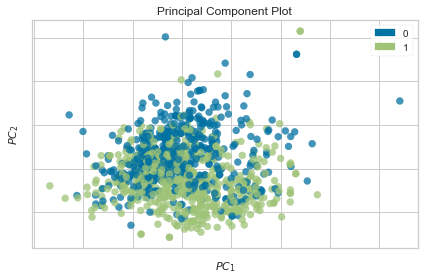

[[-16.822065     3.83665555  -1.82778363]
 [ 48.34332089  -2.70646127  -1.13654184]
 [ -2.64008351  -1.46630901   1.16877276]
 ...
 [-24.8493789    4.62062117  -1.37442284]
 [ 97.10517209 -13.75820173  -0.46466088]
 [ 29.61262051   9.68974053   0.75328863]]
2
Variance score: 0.04 

eigenvalues 256.38155435368645
3
Variance score: 0.03 

eigenvalues 58.55999525671434
4
Variance score: 0.03 

eigenvalues 47.74403668441852
5
Variance score: 0.23 

eigenvalues 33.3333006036173
6
Variance score: 0.28 

eigenvalues 6.750137008448168
7
Variance score: 0.29 

eigenvalues 5.030878956811739
8
Variance score: 0.29 

eigenvalues 3.5968464657387185
9
Variance score: 0.29 

eigenvalues 3.41972290420662
10
Variance score: 0.30 

eigenvalues 1.2851827270104095


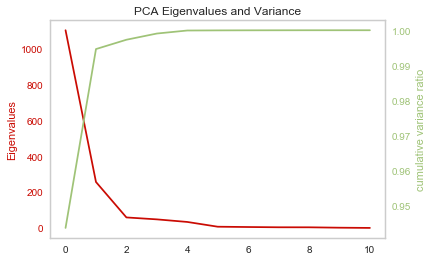

In [280]:
###PCA###


# Specify the features of interest and the target

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y_train_list])

visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(x_train_list, y_train_list)
visualizer.show()


pca = decomposition.PCA(n_components=3)
pca.fit(x_train_list)
x_train_pca = pca.transform(x_train_list)

print(x_train_pca)

for n in range(2, num_of_comp):
    pca = decomposition.PCA(n_components=n)
    pca.fit(x_train_list)
    x_train_pca = pca.transform(x_train_list)
    
    x_test_pca = pca.transform(x_test_list)
    
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train_pca, y_train_list)

    # Make predictions using the testing set
    reg_y_pred = regr.predict(x_test_pca)
    print(n)
    print('Variance score: %.2f \n' % r2_score(y_test_list, reg_y_pred))
    #print(get_eigen_value(pca_t, x_test_list))
    ###printing eigan values ???
    print("eigenvalues", pca.singular_values_[len(pca.singular_values_) - 1])

###plots for eiganvalues and 
pca = decomposition.PCA().fit(x_train_list) 

cum_var = np.cumsum(pca.explained_variance_ratio_)

fig, ax2 = plt.subplots()
ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'r')
ax2.tick_params('y', colors='r')
ax2.set_ylabel('Eigenvalues', color='r')
plt.grid(False)

ax1 = ax2.twinx()
ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'g')
ax1.tick_params('y', colors='g')
ax1.set_ylabel('cumulative variance ratio', color='g')
ax1.set_xlabel('principal components')
plt.grid(False)


plt.title("PCA Eigenvalues and Variance")
plt.show()
# The coefficients
###use a regression model to compare different numbers for PCA?


In [182]:
###ICA###

# ica = decomposition.FastICA(n_components=3)
# ica.fit(x_train_list)
# x_train_ica = ica.transform(x_train_list)

#print(x_train_pca)

for n in range(2, num_of_comp):
        
    ica = decomposition.FastICA(n_components=n, max_iter=1000)
    ica.fit(x_train_list)
    x_train_ica = ica.transform(x_train_list)
        
    #pca_t = decomposition.FastICA(n_components=n, max_iter=10000)
    #pca_t.fit(x_train_list)
    x_test_ica = ica.transform(x_test_list)
    
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train_ica, y_train_list)

    # Make predictions using the testing set
    reg_y_pred = regr.predict(x_test_ica)
    print(n)
    print('Variance score: %.2f' % r2_score(y_test_list, reg_y_pred))
    
    #print(get_eigen_value(pca_t, x_test_list))
    ###printing eigan values ???
    
    df = pd.DataFrame(x_train_ica)
    df = df.kurt(axis=0)
    
    print("kurtosis", df.abs().mean())
    print("-"*50)



2
Variance score: 0.04
kurtosis 2.0385074237294294
--------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


3
Variance score: 0.03
kurtosis 3.043075581527752
--------------------------------------------------
4
Variance score: 0.03
kurtosis 8.533201567636217
--------------------------------------------------
5
Variance score: 0.23
kurtosis 8.265466155083164
--------------------------------------------------
6
Variance score: 0.28
kurtosis 7.273013523049058
--------------------------------------------------
7
Variance score: 0.29
kurtosis 8.689473153693466
--------------------------------------------------
8
Variance score: 0.29
kurtosis 8.183372266557306
--------------------------------------------------
9
Variance score: 0.29
kurtosis 7.567166815639772
--------------------------------------------------
10
Variance score: 0.30
kurtosis 12.036480756802083
--------------------------------------------------


/usr/local/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


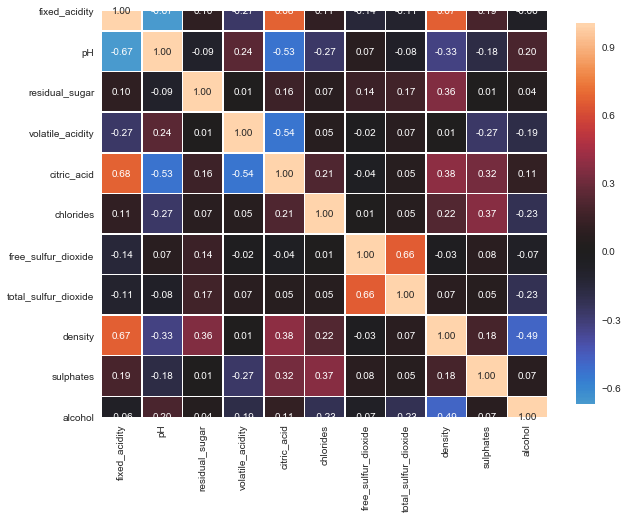

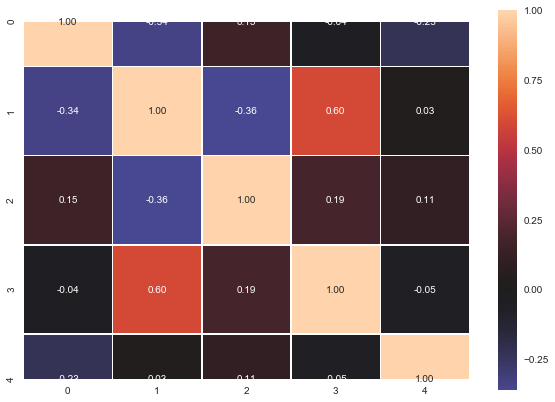

2 avg scores: 0.15097625953751498
3 avg scores: 0.18280387170172957
4 avg scores: 0.13939227999543
5 avg scores: 0.18898361861332832
6 avg scores: 0.22150791856285043
7 avg scores: 0.27563264984362806
8 avg scores: 0.2907210631832647
9 avg scores: 0.2853622614785542
10 avg scores: 0.2957103061694381


In [303]:
###Randomized Projections###

def run_rp(x, xtest):
    rp = random_projection.SparseRandomProjection(n_components=5)
    x_train_rp = rp.fit_transform(x)
    feature_corr(x)
    feature_corr(pd.DataFrame.from_records(x_train_rp))
    num_of_runs = 5
    
    for n in range(2, num_of_comp):
        runs = []
        rsum = 0
        for r in range(num_of_runs):
            rp = random_projection.SparseRandomProjection(n_components=n)
            rp.fit(x_train)
            x_train_rp = rp.transform(x_train)

            x_test_rp = rp.transform(xtest)

            regr = linear_model.LinearRegression()
            # Train the model using the training sets
            regr.fit(x_train_rp, y_train)

            # Make predictions using the testing set
            reg_y_pred = regr.predict(x_test_rp)
            rsum = rsum + r2_score(y_test_list, reg_y_pred)
            runs.append(r2_score(y_test_list, reg_y_pred))
       
        #print('Variance scores:', ", ".join(map(str, runs)))
        print(n, 'avg scores:', rsum / len(runs))
        rsum = 0

run_rp(x_train, x_test)

In [144]:
# def plot_clustering(X_red, labels, title=None):
#     x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
#     X_red = (X_red - x_min) / (x_max - x_min)

#     plt.figure(figsize=(6, 4))
#     for i in range(X_red.shape[0]):
#         plt.text(X_red[i, 0], X_red[i, 1], str(x_train_list[i]),
#                  color=plt.cm.nipy_spectral(labels[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     plt.xticks([])
#     plt.yticks([])
#     if title is not None:
#         plt.title(title, size=17)
#     plt.axis('off')
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
# for linkage in ('ward', 'average', 'complete', 'single'):
#     clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
#     t0 = time()
#     clustering.fit(x_train)
#     print("%s :\t%.2fs" % (linkage, time() - t0))

#     plot_clustering(x_train_list, clustering.labels_, "%s linkage" % linkage)

(1119, 4)
Feature ranking:
1. feature alcohol (0.173493)
2. feature volatile_acidity (0.109310)
3. feature sulphates (0.109050)
4. feature total_sulfur_dioxide (0.104744)
5. feature density (0.079950)
6. feature citric_acid (0.074150)
7. feature chlorides (0.073177)
8. feature fixed_acidity (0.072530)
9. feature residual_sugar (0.070444)
10. feature free_sulfur_dioxide (0.068974)
11. feature pH (0.064179)


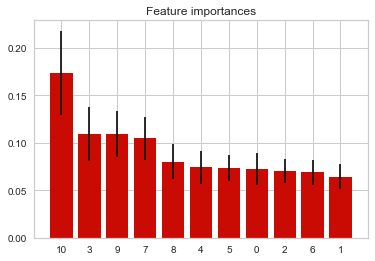

alcohol
volatile_acidity
sulphates
total_sulfur_dioxide
['alcohol', 'volatile_acidity', 'sulphates', 'total_sulfur_dioxide']
      alcohol  volatile_acidity  sulphates  total_sulfur_dioxide
0         9.4             0.700       0.56                  34.0
1         9.8             0.880       0.68                  67.0
2         9.8             0.760       0.65                  54.0
3         9.8             0.280       0.58                  60.0
4         9.4             0.700       0.56                  34.0
...       ...               ...        ...                   ...
1594     10.5             0.600       0.58                  44.0
1595     11.2             0.550       0.76                  51.0
1596     11.0             0.510       0.75                  40.0
1597     10.2             0.645       0.71                  44.0
1598     11.0             0.310       0.66                  42.0

[1599 rows x 4 columns]


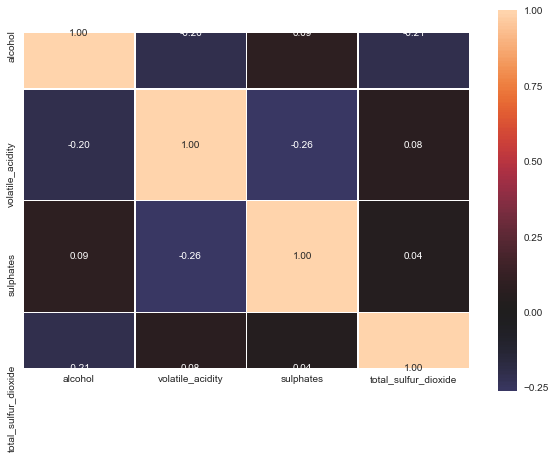

In [325]:
####EXTRA one, using trees####
#Feature importances with forests of trees

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_train, y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(x_train)
print(X_new.shape)

amount_of_features = X_new.shape[1]

####EXTRA one, using trees####

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=random_state)

forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, x_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()


FFI = []
for f in range(amount_of_features):
    FFI.append(x_train.columns[indices[f]])
    print(x_train.columns[indices[f]])


print(FFI)
x_train_ffi = x_features[FFI]
print(x_train_ffi)
feature_corr(x_train_ffi)

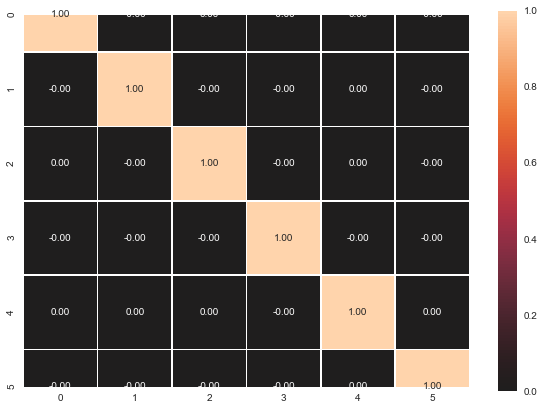

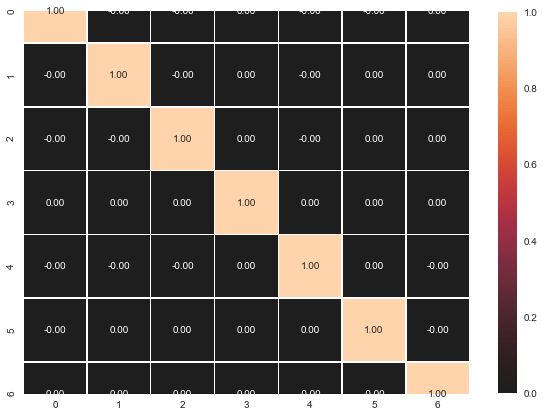

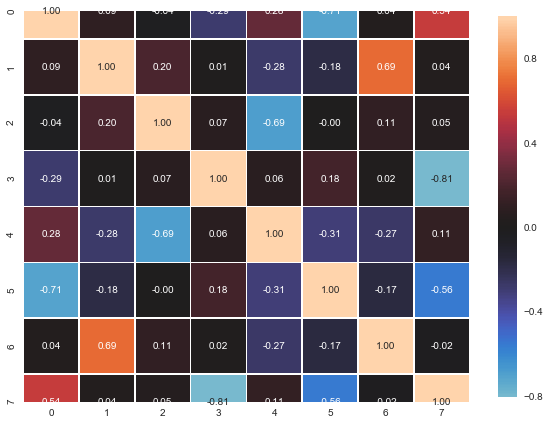

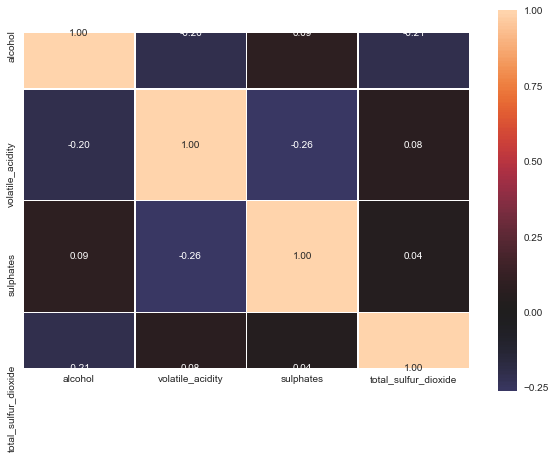

In [337]:
####final feature reductions
##PCA = 6
##ICA = 7
##RP = 8
##TOP 4

pca = decomposition.PCA(n_components=6)
pca.fit(x_train_list)
x_train_pca = pca.transform(x_train_list)
x_test_pca = pca.transform(x_test_list)

ica = decomposition.FastICA(n_components=7)
ica.fit(x_train_list)
x_train_ica = ica.transform(x_train_list)
x_test_ica = ica.transform(x_test_list)

rp = random_projection.SparseRandomProjection(n_components=8)
rp.fit(x_train)
x_train_rp = rp.transform(x_train)
x_test_rp = rp.transform(x_test)

feature_corr(pd.DataFrame.from_records(x_train_pca))
feature_corr(pd.DataFrame.from_records(x_train_ica))
feature_corr(pd.DataFrame.from_records(x_test_rp))
feature_corr(x_train_ffi)


__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	0.11s	457353	0.041	0.050	0.046	0.055	0.045	0.607
k-means++ 3	0.12s	260224	0.045	0.031	0.036	0.034	0.035	0.520
k-means++ 4	0.24s	189188	0.054	0.032	0.040	0.029	0.039	0.489
k-means++ 5	0.18s	148772	0.055	0.026	0.036	0.023	0.034	0.428
k-means++ 6	0.20s	124379	0.058	0.027	0.037	0.023	0.035	0.425
k-means++ 7	0.20s	105273	0.059	0.024	0.034	0.019	0.032	0.386
k-means++ 8	0.22s	91674	0.067	0.025	0.037	0.021	0.034	0.390
k-means++ 9	0.24s	79634	0.062	0.023	0.033	0.018	0.030	0.383
k-means++ 10	0.28s	68950	0.066	0.023	0.034	0.016	0.031	0.384
k-means++ 11	0.32s	62803	0.068	0.023	0.034	0.016	0.031	0.386
k-means++ 12	0.28s	57887	0.066	0.020	0.031	0.013	0.028	0.348
k-means++ 13	0.30s	54234	0.070	0.021	0.033	0.013	0.029	0.344
k-means++ 14	0.31s	50445	0.076	0.022	0.034	0.013	0.031	0.341
k-means++ 15	0.34s	46788	0.077	0.022	0.035	0.013	0.031	0.347
k-means++

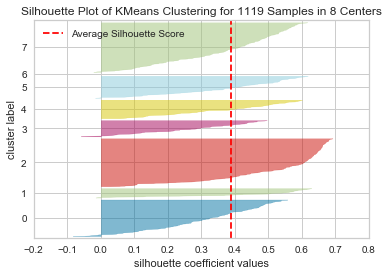

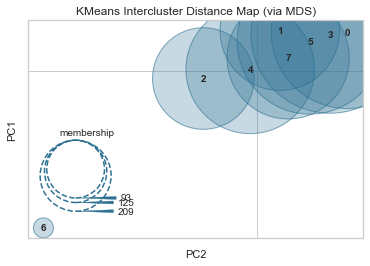

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


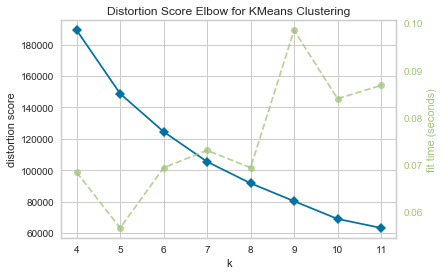

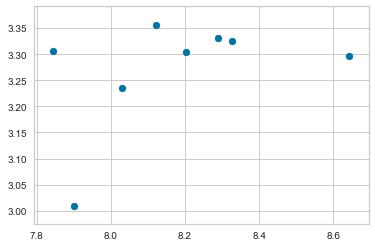

In [340]:
####RERUN kmeans PCA

run_kmeans(8, x_train_pca, y_train)
print("*"*)
run_kmeans(8, x_train_ica, y_train)
run_kmeans(8, x_train_rp, y_train)
run_kmeans(8, x_train_pca, y_train)